In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def setup_dataframe(url) :
    weather = pd.read_csv(url, parse_dates=["time"])
    weather["precipitation_sum (mm)"] = weather["precipitation_sum (mm)"].replace(np.nan, 0)
    weather.rename(columns={
    "temperature_2m_max (°C)": "max_temp",
    "temperature_2m_min (°C)": "min_temp",
    "temperature_2m_mean (°C)": "mean_temp",
    "precipitation_sum (mm)": "precipitation"
    }, inplace=True)
    years = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1) #lista degli anni del campionamento

    seasons = []
    for row in weather.itertuples(index=True, name='Pandas'):
        seasons.append(toSeasonString(int(row[1].strftime('%m'))))
    weather["season"] = seasons
    
    return weather, years

def toSeasonString(month) :
    if month==3 or month==4 or month==5 :
        return "Primavera"
    if month==6 or month==7 or month==8 :
        return "Estate"
    if month==9 or month==10 or month==11 :
        return "Autunno"
    if month==12 or month==1 or month==2 :
        return "Inverno"
    return "Nessuno"

In [3]:
def avg_max_temp_by_year(weather, years) : 
    means = []
    for year in years : 
        mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["max_temp"].mean()
        means.append(mean)
    analysis_maxtemp = pd.DataFrame({"years" : years, "mean" : means})

    plt.scatter(analysis_maxtemp.years, analysis_maxtemp["mean"])
    plt.show()
    print(analysis_maxtemp.years.corr(analysis_maxtemp["mean"]))

def avg_mean_temp_by_year(weather, years) :
    means = []
    for year in years : 
        mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["mean_temp"].mean()
        means.append(mean)
    analysis_meantemp = pd.DataFrame({"years" : years, "mean" : means})

    plt.figure(figsize=(10, 6))

    plt.scatter(analysis_meantemp.years, analysis_meantemp["mean"], label="Average temperature")

    z = np.polyfit(analysis_meantemp.years, analysis_meantemp["mean"], 6)
    p = np.poly1d(z)
    plt.plot(analysis_meantemp.years, p(analysis_meantemp.years), color="red", linewidth=3.0, label="Correlation")

    plt.title("Average Annual Temperature")
    plt.xlabel("Year")
    plt.ylabel("Temperature °C")
    plt.legend(loc="upper left")

    plt.show()
    analysis_meantemp.years.corr(analysis_meantemp["mean"])

def max_max_temp_by_year(weather, years) :
    maxs = []
    for year in years : 
        max = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["max_temp"].max()
        maxs.append(max)
    analysis_maxtemp = pd.DataFrame({"years" : years, "max" : maxs})
    
    plt.figure(figsize=(10, 6))

    plt.scatter(analysis_maxtemp.years, analysis_maxtemp["max"], label="Max temperature")

    z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp["max"], 6)
    p = np.poly1d(z)
    plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="red", linewidth=3.0, label="Correlation")

    plt.title("Max Annual Temperature")
    plt.xlabel("Year")
    plt.ylabel("Temperature °C")
    plt.legend(loc="upper left")

    plt.show()
    analysis_maxtemp.years.corr(analysis_maxtemp["max"])

In [4]:
def seasonal_max_max_temp_by_year(weather, years) :
    primavera_maxes = []
    estate_maxes = []
    autunno_maxes = []
    inverno_maxes = []
    for year in years : 
        primavera_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Primavera")]["max_temp"].max()
        primavera_maxes.append(primavera_max)
        estate_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Estate")]["max_temp"].max()
        estate_maxes.append(estate_max)
        autunno_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Autunno")]["max_temp"].max()
        autunno_maxes.append(autunno_max)
        inverno_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Inverno")]["max_temp"].max()
        inverno_maxes.append(inverno_max)

    analysis_maxtemp = pd.DataFrame({"years" : years, "primavera" : primavera_maxes, "estate" : estate_maxes, "autunno" : autunno_maxes, "inverno" : inverno_maxes})

    fig, ax = plt.subplots(2, 2)

    fig.set_size_inches(14,9)

    # Spring
    ax[0,0].scatter(analysis_maxtemp.years, analysis_maxtemp.primavera, color="lightgreen", label="Mean spring")

    z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.primavera, 6)
    p = np.poly1d(z)
    ax[0,0].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="green", linewidth=3.0, label="Trend spring")

    ax[0,0].set_title('Annual Max in Spring')
    ax[0,0].set_xlabel("Year")
    ax[0,0].set_ylabel("Temperature °C")
    ax[0,0].legend(loc="upper left")

    # Summer
    ax[0,1].scatter(analysis_maxtemp.years, analysis_maxtemp.estate, color="lightsalmon", label="Mean summer")

    z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.estate, 6)
    p = np.poly1d(z)
    ax[0,1].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="red", linewidth=3.0, label="Trend summer")

    ax[0,1].set_title('Annual Max in Summer')
    ax[0,1].set_xlabel("Year")
    ax[0,1].set_ylabel("Temperature °C")
    ax[0,1].legend(loc="upper right")

    # Autumn
    ax[1, 0].scatter(analysis_maxtemp.years, analysis_maxtemp.autunno, color="wheat", label="Mean autumn")

    z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.autunno, 6)
    p = np.poly1d(z)
    ax[1, 0].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="orange", linewidth=3.0, label="Trend autumn")


    ax[1,0].set_title('Annual Max in Autumn')
    ax[1,0].set_xlabel("Year")
    ax[1,0].set_ylabel("Temperature °C")
    ax[1,0].legend(loc="lower left")


    # Winter
    ax[1,1].scatter(analysis_maxtemp.years, analysis_maxtemp.inverno, color="lightblue", label="Mean winter")

    z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.inverno, 6)
    p = np.poly1d(z)
    ax[1,1].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="blue", linewidth=3.0, label="Trend winter")

    ax[1,1].set_title('Annual Max in Winter')
    ax[1,1].set_xlabel("Year")
    ax[1,1].set_ylabel("Temperature °C")
    ax[1,1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    print("Correlazione anno-temperatura massima in primavera: ", analysis_maxtemp.years.corr(analysis_maxtemp.primavera))
    print("Correlazione anno-temperatura massima in estate: ", analysis_maxtemp.years.corr(analysis_maxtemp.estate))
    print("Correlazione anno-temperatura massima in autunno: ", analysis_maxtemp.years.corr(analysis_maxtemp.autunno))
    print("Correlazione anno-temperatura massima in inverno: ", analysis_maxtemp.years.corr(analysis_maxtemp.inverno))

In [5]:
def seasonal_mean_mean_by_year(weather, years) : 
    primavera_means = []
    estate_means = []
    autunno_means = []
    inverno_means = []
    means_label = []
    for year in years : 
        primavera_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Primavera")]["mean_temp"].mean()
        primavera_means.append(primavera_mean)
        estate_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Estate")]["mean_temp"].mean()
        estate_means.append(estate_mean)
        autunno_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Autunno")]["mean_temp"].mean()
        autunno_means.append(autunno_mean)
        inverno_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Inverno")]["mean_temp"].mean()
        inverno_means.append(inverno_mean)

        means_label.append(str(year))
    analysis_meantemp = pd.DataFrame({"years" : years, "primavera" : primavera_means, "estate" : estate_means, "autunno" : autunno_means, "inverno" : inverno_means})
    
    fig, ax = plt.subplots(2, 2)

    fig.set_size_inches(14,9)

    # Spring
    ax[0,0].scatter(analysis_meantemp.years, analysis_meantemp.primavera, color="lightgreen", label="Average temperature")

    z = np.polyfit(analysis_meantemp.years, analysis_meantemp.primavera, 6)
    p = np.poly1d(z)
    ax[0,0].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="green", linewidth=3.0, label="Trend spring")

    ax[0,0].set_title('Annual Average Temperature in Spring')
    ax[0,0].set_xlabel("Year")
    ax[0,0].set_ylabel("Temperature °C")
    ax[0,0].legend(loc="upper left")

    # Summer
    ax[0,1].scatter(analysis_meantemp.years, analysis_meantemp.estate, color="lightsalmon", label="Average temperature")

    z = np.polyfit(analysis_meantemp.years, analysis_meantemp.estate, 6)
    p = np.poly1d(z)
    ax[0,1].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="red", linewidth=3.0, label="Trend summer")

    ax[0,1].set_title('Annual Average Temperature in Summer')
    ax[0,1].set_xlabel("Year")
    ax[0,1].set_ylabel("Temperature °C")
    ax[0,1].legend(loc="upper right")

    # Autumn
    ax[1, 0].scatter(analysis_meantemp.years, analysis_meantemp.autunno, color="wheat", label="Average temperature")

    z = np.polyfit(analysis_meantemp.years, analysis_meantemp.autunno, 6)
    p = np.poly1d(z)
    ax[1, 0].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="orange", linewidth=3.0, label="Trend autumn")


    ax[1,0].set_title('Annual Average Temperature in Autumn')
    ax[1,0].set_xlabel("Year")
    ax[1,0].set_ylabel("Temperature °C")
    ax[1,0].legend(loc="lower left")

    # Winter
    ax[1,1].scatter(analysis_meantemp.years, analysis_meantemp.inverno, color="lightblue", label="Average temperature")

    z = np.polyfit(analysis_meantemp.years, analysis_meantemp.inverno, 6)
    p = np.poly1d(z)
    ax[1,1].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="blue", linewidth=3.0, label="Trend winter")

    ax[1,1].set_title('Annual Average Temperature in Winter')
    ax[1,1].set_xlabel("Year")
    ax[1,1].set_ylabel("Temperature °C")
    ax[1,1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()

    print("Correlazione anno-temperatura media in primavera: ", analysis_meantemp.years.corr(analysis_meantemp.primavera))
    print("Correlazione anno-temperatura media in estate: ", analysis_meantemp.years.corr(analysis_meantemp.estate))
    print("Correlazione anno-temperatura media in autunno: ", analysis_meantemp.years.corr(analysis_meantemp.autunno))
    print("Correlazione anno-temperatura media in inverno: ", analysis_meantemp.years.corr(analysis_meantemp.inverno))

In [6]:
def events_precipitation_by_year(weather, years) : 
    forte = []
    rovesci = []
    nubifragi = []
    nubifragi_max = []
    for year in years : 
        dfyear = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation"]
        count_forte  = len(dfyear[(weather["precipitation"]>=6) & (weather["precipitation"]<10)])
        forte.append(count_forte)
        count_rovesci  = len(dfyear[(weather["precipitation"]>=10) & (weather["precipitation"]<30)])
        rovesci.append(count_rovesci)
        count_nubifragi  = len(dfyear[weather["precipitation"]>=30])
        nubifragi.append(count_nubifragi)
        nubifragi_max.append(dfyear.max())
    analysis_precipitation = pd.DataFrame({"years" : years, "Pioggia forte (6-10 mm)" : forte, "Rovesci (10-30 mm)" : rovesci , "Nubifragi (+30mm)" : nubifragi, "Massimo nubifragio": nubifragi_max})
    analysis_precipitation.drop(analysis_precipitation.tail(1).index,inplace=True) 

    fig = plt.figure()
    fig.set_size_inches(14,9)

    plt.scatter(analysis_precipitation.years, analysis_precipitation["Pioggia forte (6-10 mm)"], color="lightgreen", label="Pioggia forte")
    z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Pioggia forte (6-10 mm)"], 6)
    p = np.poly1d(z)
    plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="green", linewidth=3.0, label="Trend pioggia forte")

    plt.scatter(analysis_precipitation.years, analysis_precipitation["Rovesci (10-30 mm)"], color="lightblue", label="Rovescio")
    z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Rovesci (10-30 mm)"], 6)
    p = np.poly1d(z)
    plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="blue", linewidth=3.0, label="Trend rovesci")

    plt.scatter(analysis_precipitation.years, analysis_precipitation["Nubifragi (+30mm)"], color="lightsalmon", label="Nubifragio")
    z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Nubifragi (+30mm)"], 6)
    p = np.poly1d(z)
    plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="red", linewidth=3.0, label="Trend nubifragi")

    plt.xlabel("Year")
    plt.ylabel("Count events")
    plt.title("Precipitation Events")
    plt.legend(loc="upper left")

    plt.show()

    print("Correlazione anno-pioggia forte", analysis_precipitation.years.corr(analysis_precipitation["Pioggia forte (6-10 mm)"]))
    print("Correlazione anno-rovesci", analysis_precipitation.years.corr(analysis_precipitation["Rovesci (10-30 mm)"]))
    print("Correlazione anno-nubifragi", analysis_precipitation.years.corr(analysis_precipitation["Nubifragi (+30mm)"]))

    fig = plt.figure()
    fig.set_size_inches(14,9)

    plt.scatter(analysis_precipitation.years, analysis_precipitation["Massimo nubifragio"], color="lightsalmon", label="Nubifragio peggiore")
    z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Massimo nubifragio"], 6)
    p = np.poly1d(z)
    plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="red", linewidth=3.0, label="Trend nubifragio peggiore")

    plt.xlabel("Year")
    plt.ylabel("Precipitation (mm)")
    plt.title("Worst Nubifragio")
    plt.legend(loc="upper left")

    plt.show()

In [7]:
def seasonal_total_precipitation_by_year(weather, years) :
    primavera_sum = []
    estate_sum = []
    autunno_sum = []
    inverno_sum = []
    sum_label = []
    for year in years : 
        a_primavera_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Primavera")]["precipitation"].sum()
        primavera_sum.append(a_primavera_sum)
        a_estate_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Estate")]["precipitation"].sum()
        estate_sum.append(a_estate_sum)
        a_autunno_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Autunno")]["precipitation"].sum()
        autunno_sum.append(a_autunno_sum)
        a_inverno_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Inverno")]["precipitation"].sum()
        inverno_sum.append(a_inverno_sum)

        sum_label.append(str(year))
    analysis_precipitation = pd.DataFrame({"years" : years, "primavera" : primavera_sum, "estate" : estate_sum, "autunno" : autunno_sum, "inverno" : inverno_sum})

    ax = analysis_precipitation.plot(x='years', kind='bar', stacked=True, title='Total precipitation (mm)', color=["lightgreen", "lightsalmon", "wheat", "lightblue"], figsize=(15,10))

    z = np.polyfit(analysis_precipitation.years, analysis_precipitation.inverno, 6)
    p = np.poly1d(z)
    plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="blue", linewidth=3.0, label="Trend winter")

    plt.locator_params(nbins=15)
    plt.legend(prop={'size': 8})

    plt.show()

    print("Correlazioni anno-totale precipitazioni annuali: ", analysis_precipitation.years.corr(analysis_precipitation.primavera+analysis_precipitation.estate+analysis_precipitation.autunno+analysis_precipitation.inverno))
    print("Correlazioni anno-totale precipitazioni in primavera: ", analysis_precipitation.years.corr(analysis_precipitation.primavera))
    print("Correlazioni anno-totale precipitazioni in estate: ", analysis_precipitation.years.corr(analysis_precipitation.estate))
    print("Correlazioni anno-totale precipitazioni in autunno: ", analysis_precipitation.years.corr(analysis_precipitation.autunno))
    print("Correlazioni anno-totale precipitazioni in inverno: ", analysis_precipitation.years.corr(analysis_precipitation.inverno))

In [8]:
def concentration_precipitation_by_year(weather, years) : 
    precipitation = np.array(weather["precipitation"])
    precipitation.sort()

    def gini(arr):
        count = arr.size
        coefficient = 2 / count
        indexes = np.arange(1, count + 1)
        weighted_sum = (indexes * arr).sum()
        total = arr.sum()
        constant = (count + 1) / count
        return coefficient * weighted_sum / total - constant

    def lorenz(arr):
        # this divides the prefix sum by the total sum
        # this ensures all the values are between 0 and 1.0
        scaled_prefix_sum = arr.cumsum() / arr.sum()
        # this prepends the 0 value (because 0% of all people have 0% of all wealth)
        return np.insert(scaled_prefix_sum, 0, 0)

    # show the gini index!
    print(gini(precipitation))

    lorenz_curve = lorenz(precipitation)

    # we need the X values to be between 0.0 to 1.0
    plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
    # plot the straight line perfect equality curve
    plt.plot([0,1], [0,1])

    plt.title("Lorenz Curve")

    plt.show()

    all_precipitation = []
    for year in years :
        precipitation = np.array(weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation"])
        precipitation.sort()
        gini_index = gini(precipitation)
        #print(gini_index)
        all_precipitation.append(gini_index)

    plt.plot(years, all_precipitation, label="Gini Index", color="lightblue")

    z = np.polyfit(years, all_precipitation, 5)
    p = np.poly1d(z)
    plt.plot(years, p(years), color="blue", linewidth=3.0, label="Trend Gini Index")

    plt.title("Gini Index Precipitation")
    plt.xlabel("Year")
    plt.ylabel("Gini Index")
    plt.legend(loc="upper left")

    plt.show()
    all_precipitation = pd.DataFrame(all_precipitation)
    years = pd.DataFrame(years)
    print("Correlazione anno-indice di concentrazione", years[0].corr(all_precipitation[0]))

# Città: Milano

In [9]:
weather, years = setup_dataframe("data/historical-weather-1940-2022/milano.csv")
weather

,time,max_temp,min_temp,mean_temp,precipitation,rain_sum (mm),snowfall_sum (cm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),season
0,1940-01-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Inverno
1,1940-01-02,1.1,-5.5,-2.4,0.0,0.0,0.00,4.91,0.52,Inverno
2,1940-01-03,-1.4,-6.5,-4.5,0.0,0.0,0.00,5.81,0.44,Inverno
3,1940-01-04,3.1,-4.2,-0.1,1.6,0.0,1.12,2.32,0.29,Inverno
4,1940-01-05,5.6,-0.3,2.5,0.1,0.1,0.00,4.36,0.46,Inverno
...,...,...,...,...,...,...,...,...,...,...
30311,2022-12-27,11.8,1.3,6.4,0.0,0.0,0.00,6.15,0.69,Inverno
30312,2022-12-28,8.9,2.0,5.7,0.4,0.4,0.00,2.32,0.35,Inverno
30313,2022-12-29,9.1,4.2,6.7,0.8,0.8,0.00,1.95,0.34,Inverno
30314,2022-12-30,9.2,6.8,7.9,0.6,0.6,0.00,2.34,0.35,Inverno


## Temperature medie delle temperature massime per anno

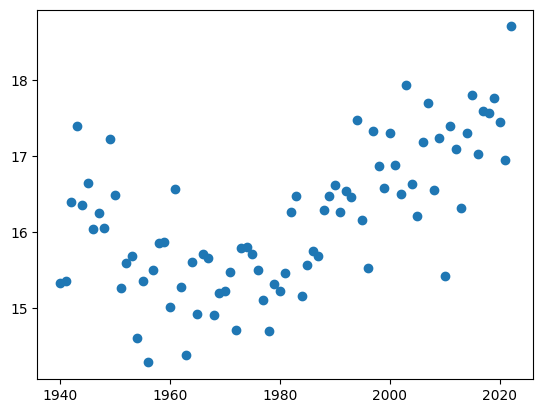

0.5954875566225891


In [10]:
avg_max_temp_by_year(weather, years)

## La stessa relazione c è anche per le temperature medie giornaliere?

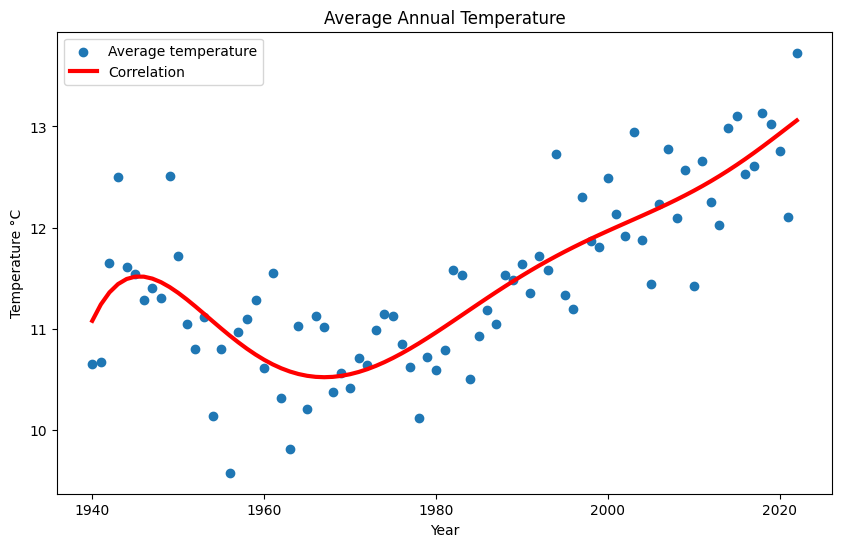

In [11]:
avg_mean_temp_by_year(weather, years)

## Temperature massime per anno 

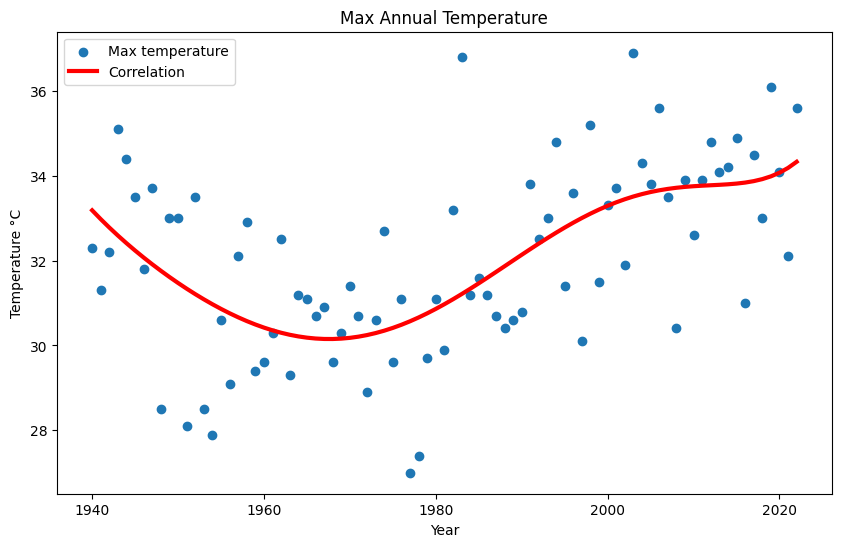

In [12]:
max_max_temp_by_year(weather, years)

## Temperature massime stagionali per anno

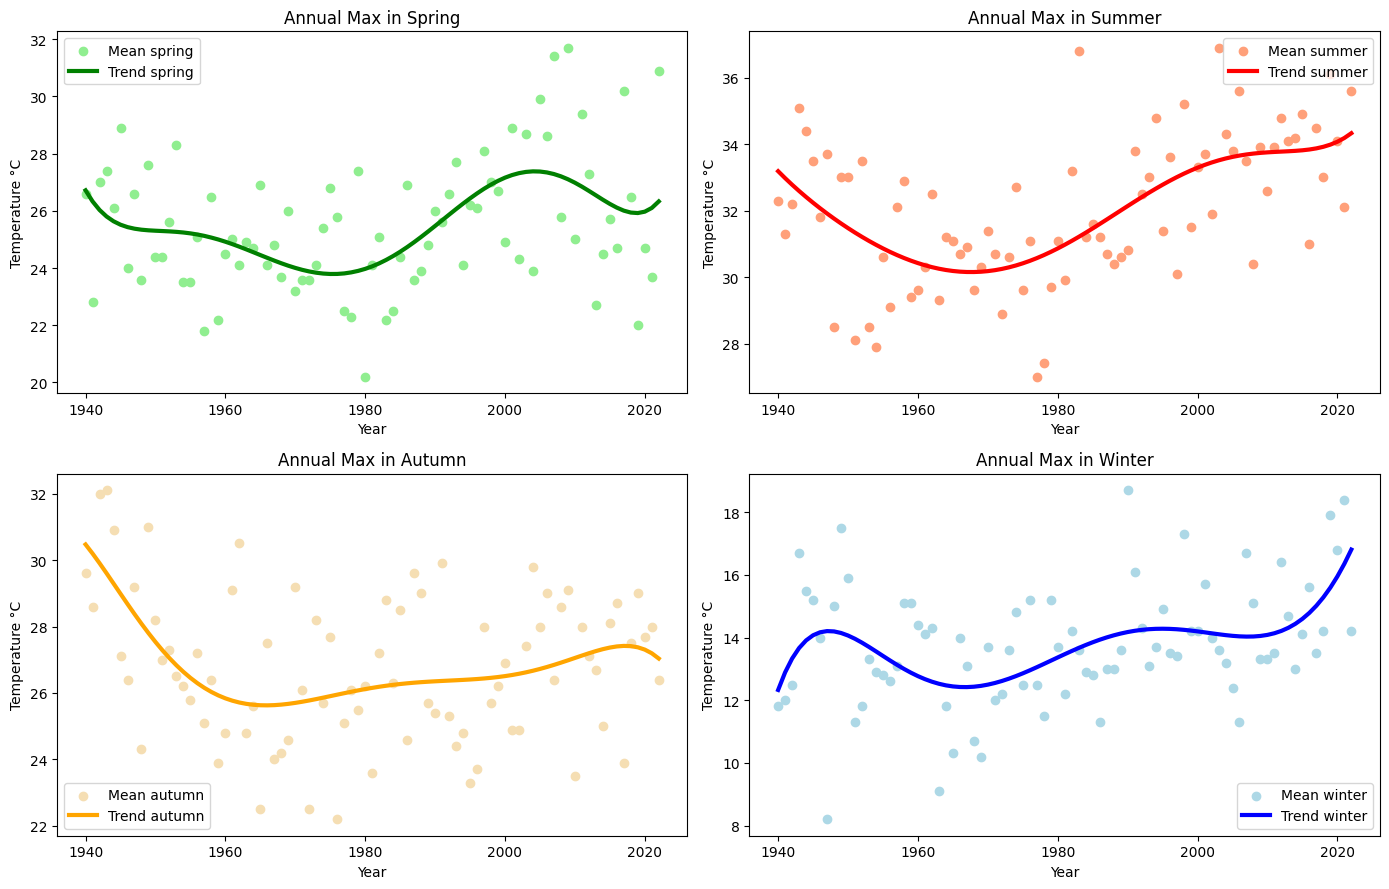

Correlazione anno-temperatura massima in primavera:  0.2440115451502877
Correlazione anno-temperatura massima in estate:  0.42824656717814386
Correlazione anno-temperatura massima in autunno:  -0.10755920932491495
Correlazione anno-temperatura massima in inverno:  0.29831725959662186


In [13]:
seasonal_max_max_temp_by_year(weather, years)

## Temperature medie stagionali per anno

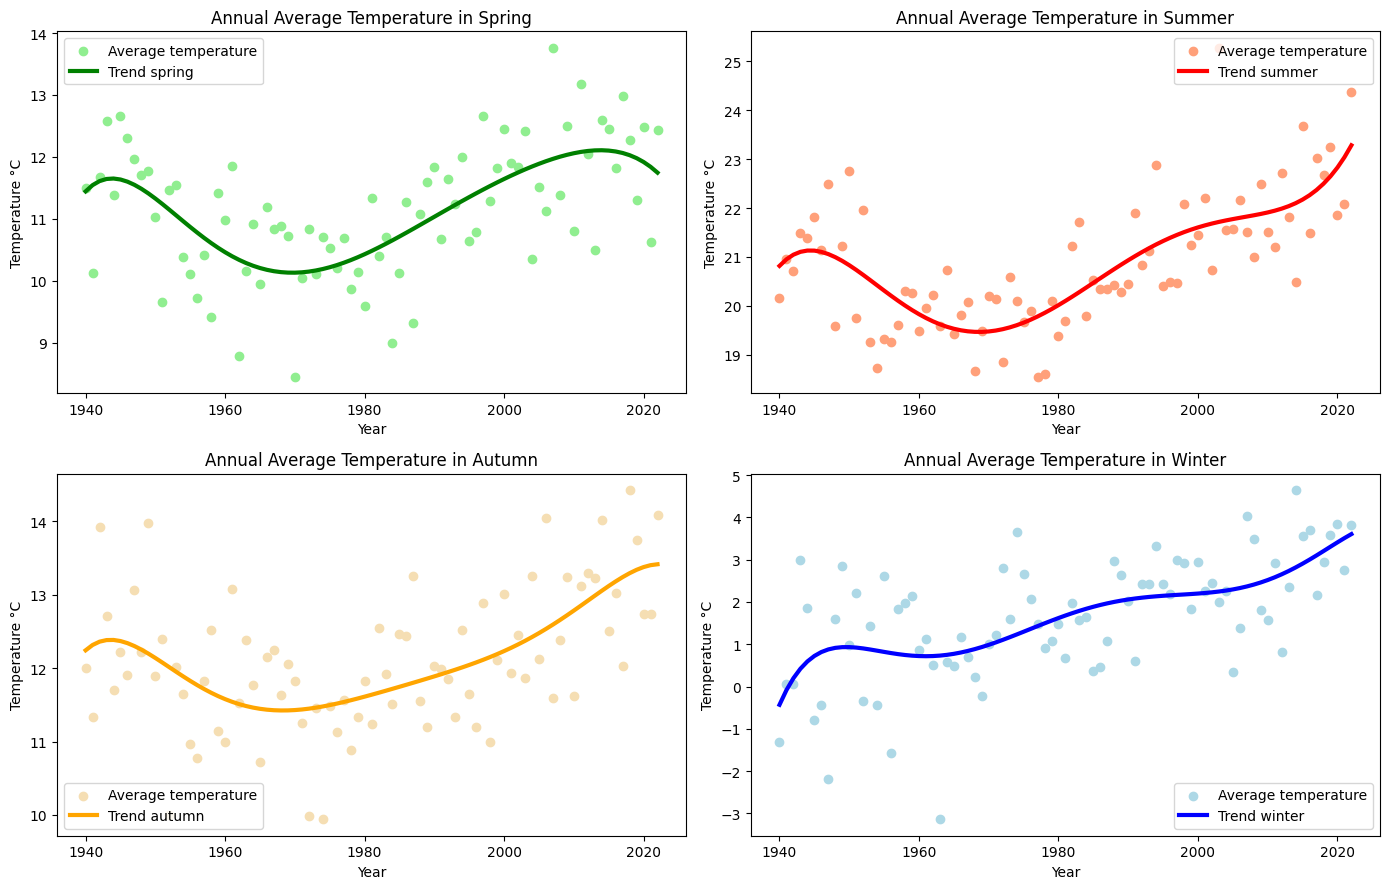

Correlazione anno-temperatura media in primavera:  0.3308122950811888
Correlazione anno-temperatura media in estate:  0.5075055251967263
Correlazione anno-temperatura media in autunno:  0.3630711767231794
Correlazione anno-temperatura media in inverno:  0.5927896551437736


In [14]:
seasonal_mean_mean_by_year(weather, years)

## Precipitazioni

### Analisi precipitazioni: eventi

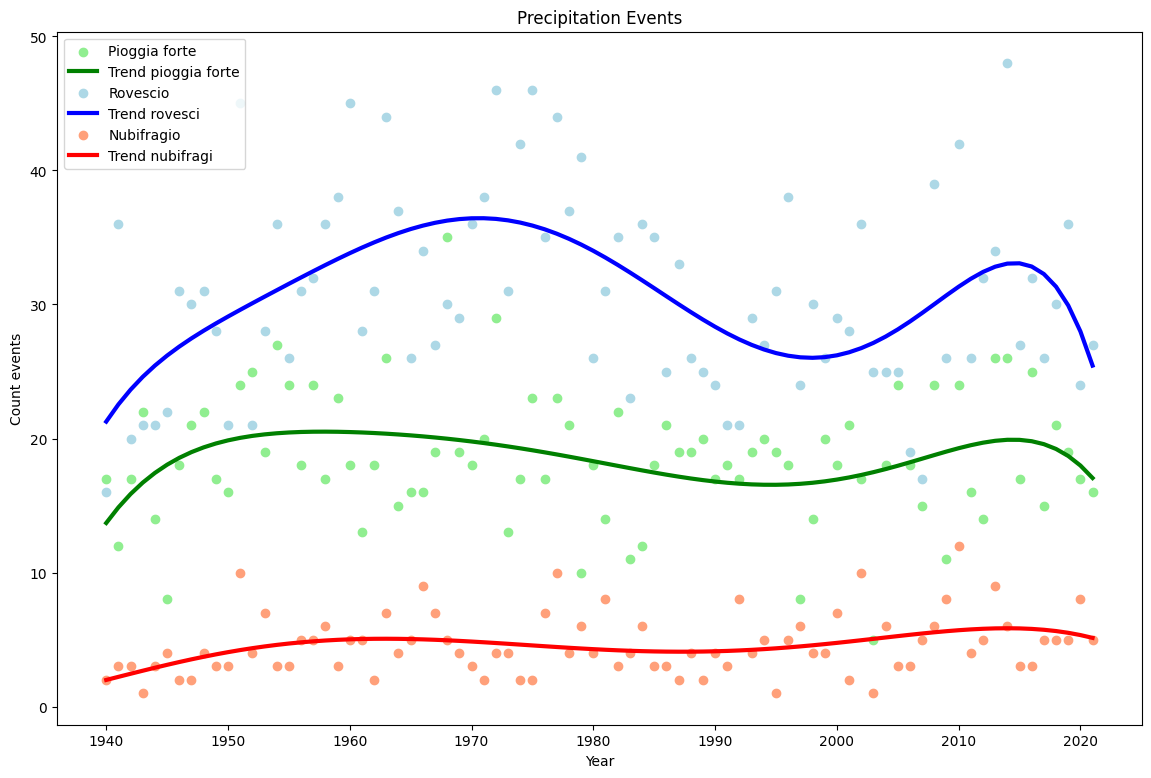

Correlazione anno-pioggia forte -0.05150384618876361
Correlazione anno-rovesci -0.015249411982472845
Correlazione anno-nubifragi 0.24307477286750492


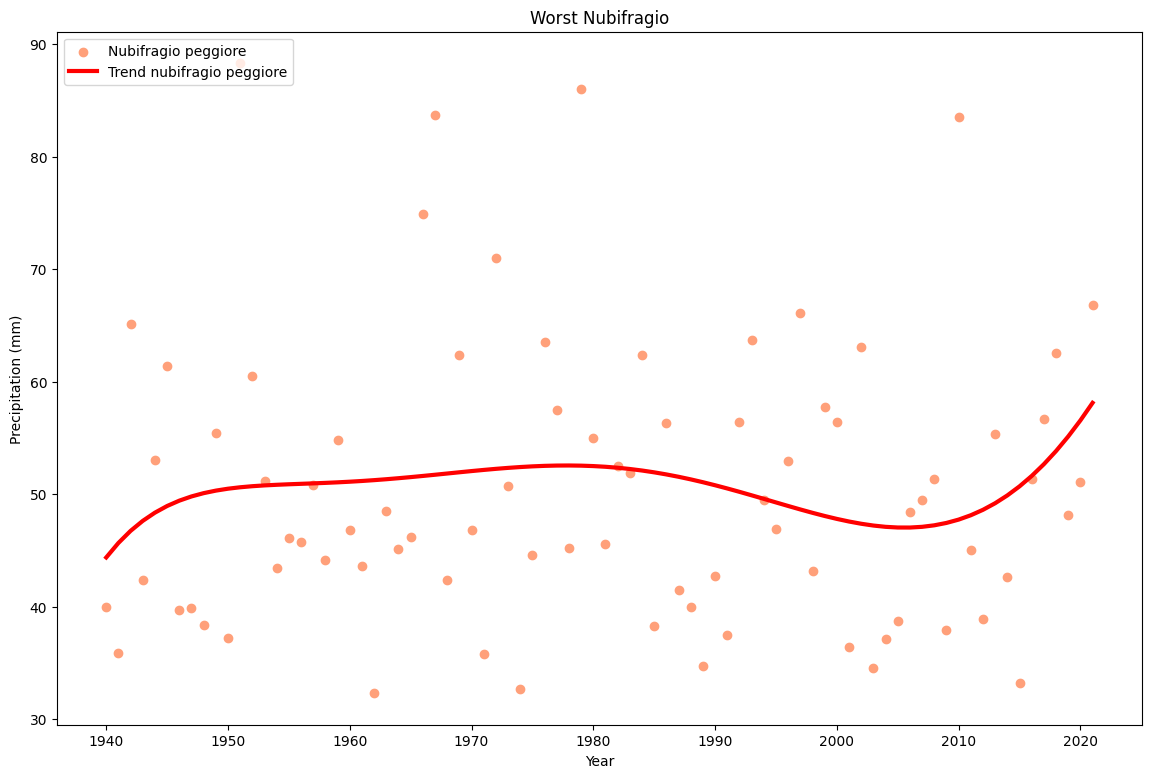

In [15]:
events_precipitation_by_year(weather, years)

### Analisi precipitazioni: stagioni

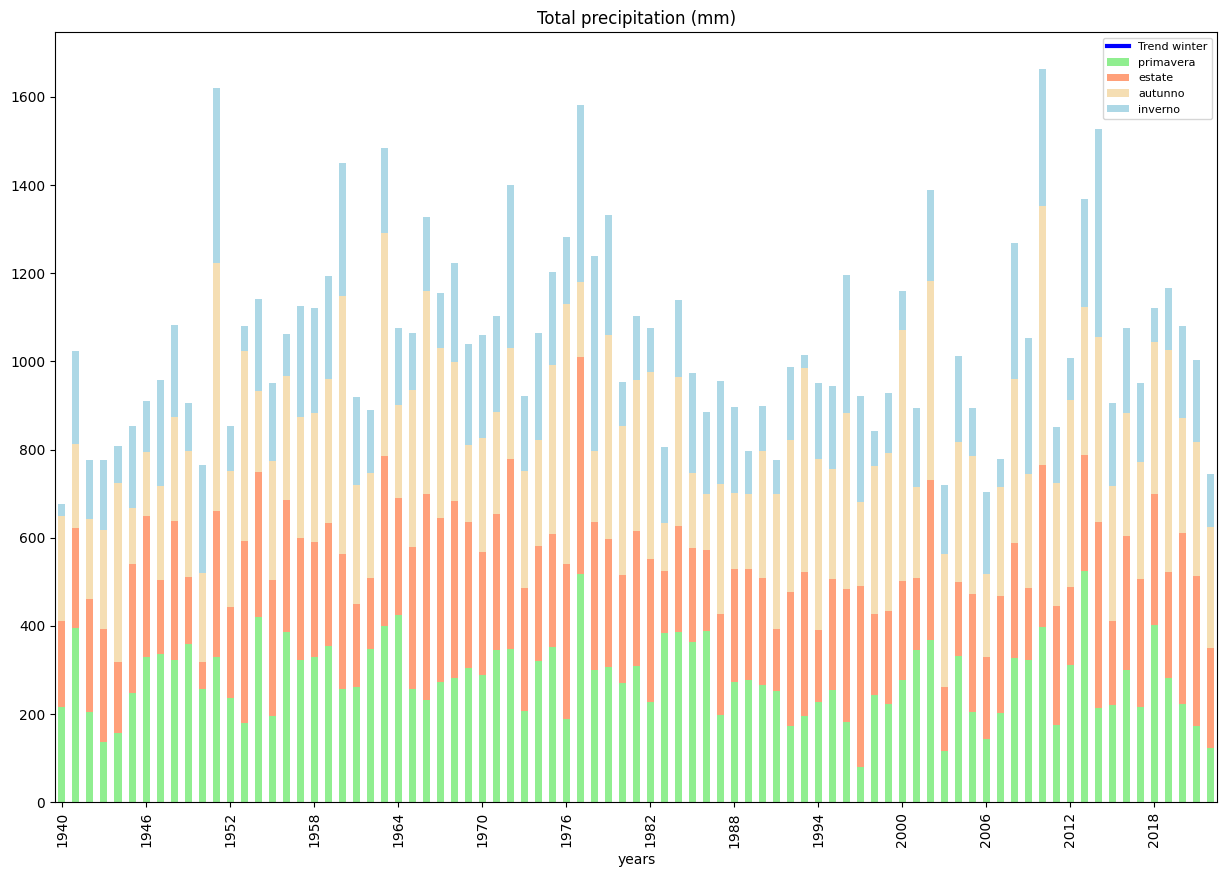

Correlazioni anno-totale precipitazioni annuali:  0.03806538249427467
Correlazioni anno-totale precipitazioni in primavera:  -0.14518536463116685
Correlazioni anno-totale precipitazioni in estate:  -0.020558395790621804
Correlazioni anno-totale precipitazioni in autunno:  0.18316485754942494
Correlazioni anno-totale precipitazioni in inverno:  0.020728520068098145


In [16]:
seasonal_total_precipitation_by_year(weather, years)

### Analisi precipitazioni: concentrazione

0.8298638427765697


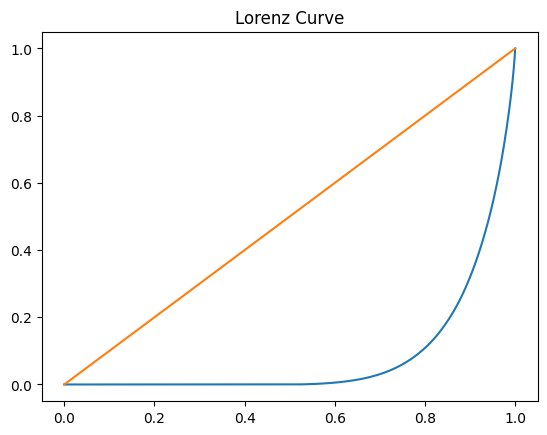

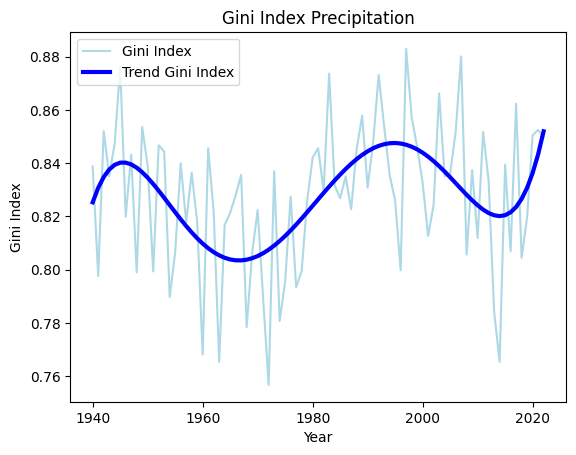

Correlazione anno-indice di concentrazione 0.14523248735219194


In [17]:
concentration_precipitation_by_year(weather, years)

# Montagna: Livigno

In [18]:
weather, years = setup_dataframe("data/historical-weather-1940-2022/livigno.csv")
weather

,time,max_temp,min_temp,mean_temp,precipitation,rain_sum (mm),snowfall_sum (cm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),season
0,1940-01-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Inverno
1,1940-01-02,-16.6,-30.4,-25.1,0.0,0.0,0.00,7.30,0.27,Inverno
2,1940-01-03,-14.2,-26.0,-20.4,0.0,0.0,0.00,7.05,0.32,Inverno
3,1940-01-04,-5.5,-20.7,-11.3,0.8,0.0,0.56,4.54,0.33,Inverno
4,1940-01-05,-5.6,-15.3,-11.2,0.0,0.0,0.00,6.26,0.39,Inverno
...,...,...,...,...,...,...,...,...,...,...
30311,2022-12-27,-1.3,-7.7,-4.5,0.2,0.1,0.07,6.01,0.46,Inverno
30312,2022-12-28,-2.2,-11.0,-6.3,0.0,0.0,0.00,4.46,0.37,Inverno
30313,2022-12-29,-2.2,-10.2,-6.0,1.0,0.0,0.70,4.85,0.37,Inverno
30314,2022-12-30,-0.2,-4.5,-2.3,2.6,0.2,1.68,3.58,0.36,Inverno


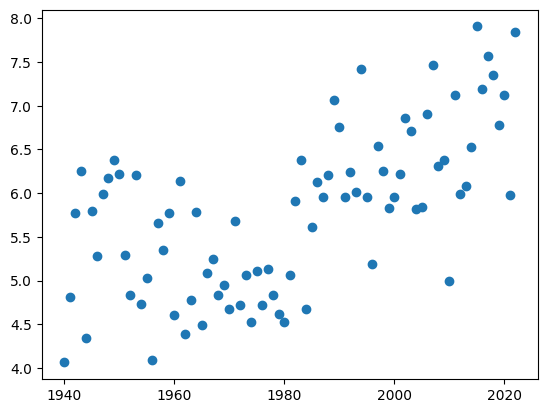

0.6181789850613642


In [19]:
avg_max_temp_by_year(weather, years)

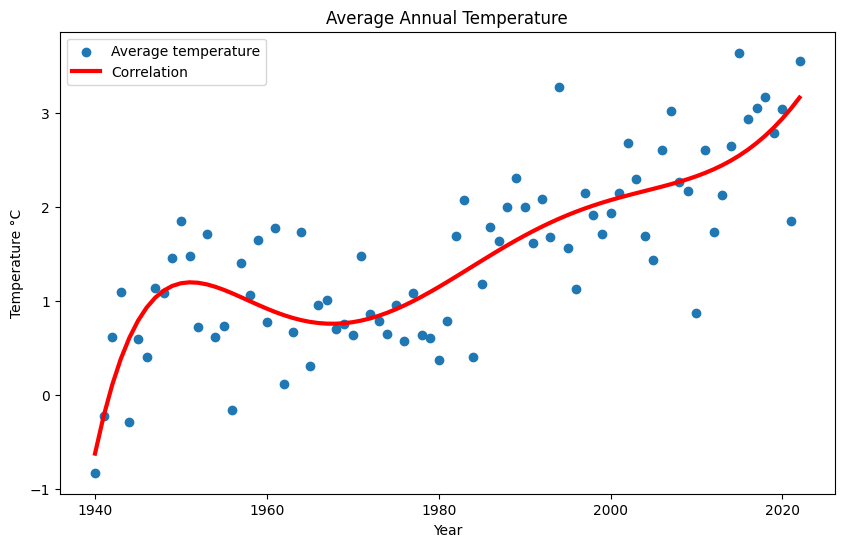

In [20]:
avg_mean_temp_by_year(weather, years)

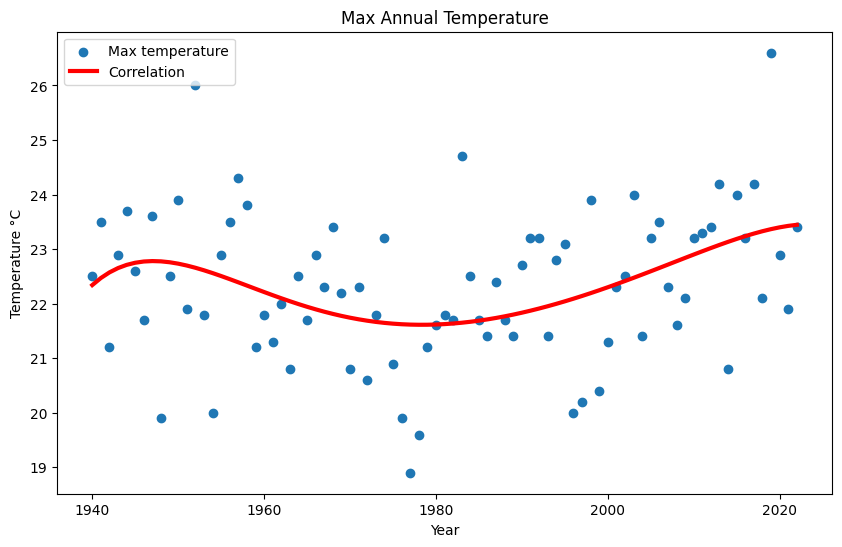

In [21]:
max_max_temp_by_year(weather, years)

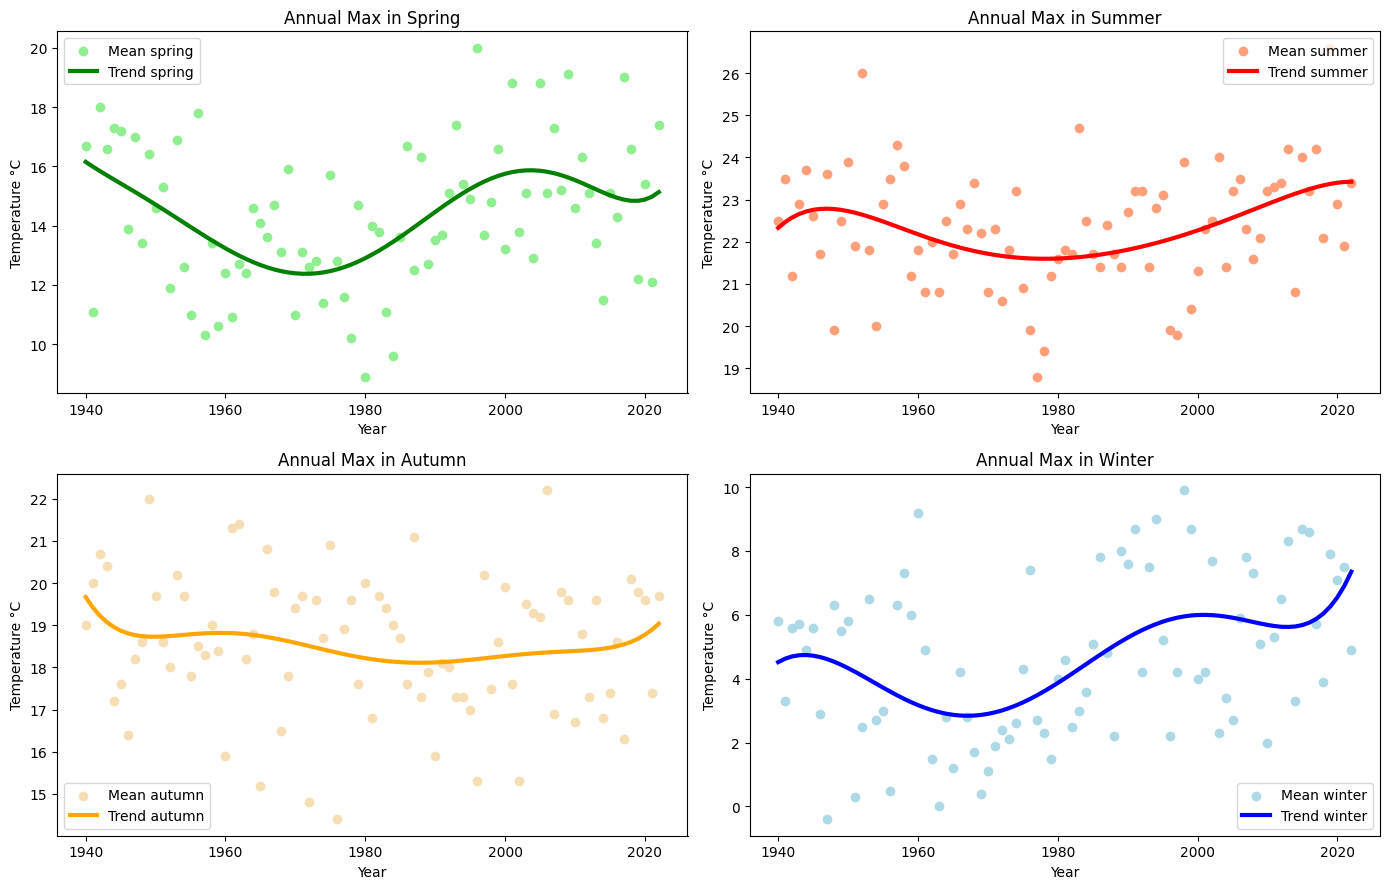

Correlazione anno-temperatura massima in primavera:  0.1636859451947346
Correlazione anno-temperatura massima in estate:  0.12295047808633586
Correlazione anno-temperatura massima in autunno:  -0.10976446023270313
Correlazione anno-temperatura massima in inverno:  0.34132728881400415


In [22]:
seasonal_max_max_temp_by_year(weather, years)

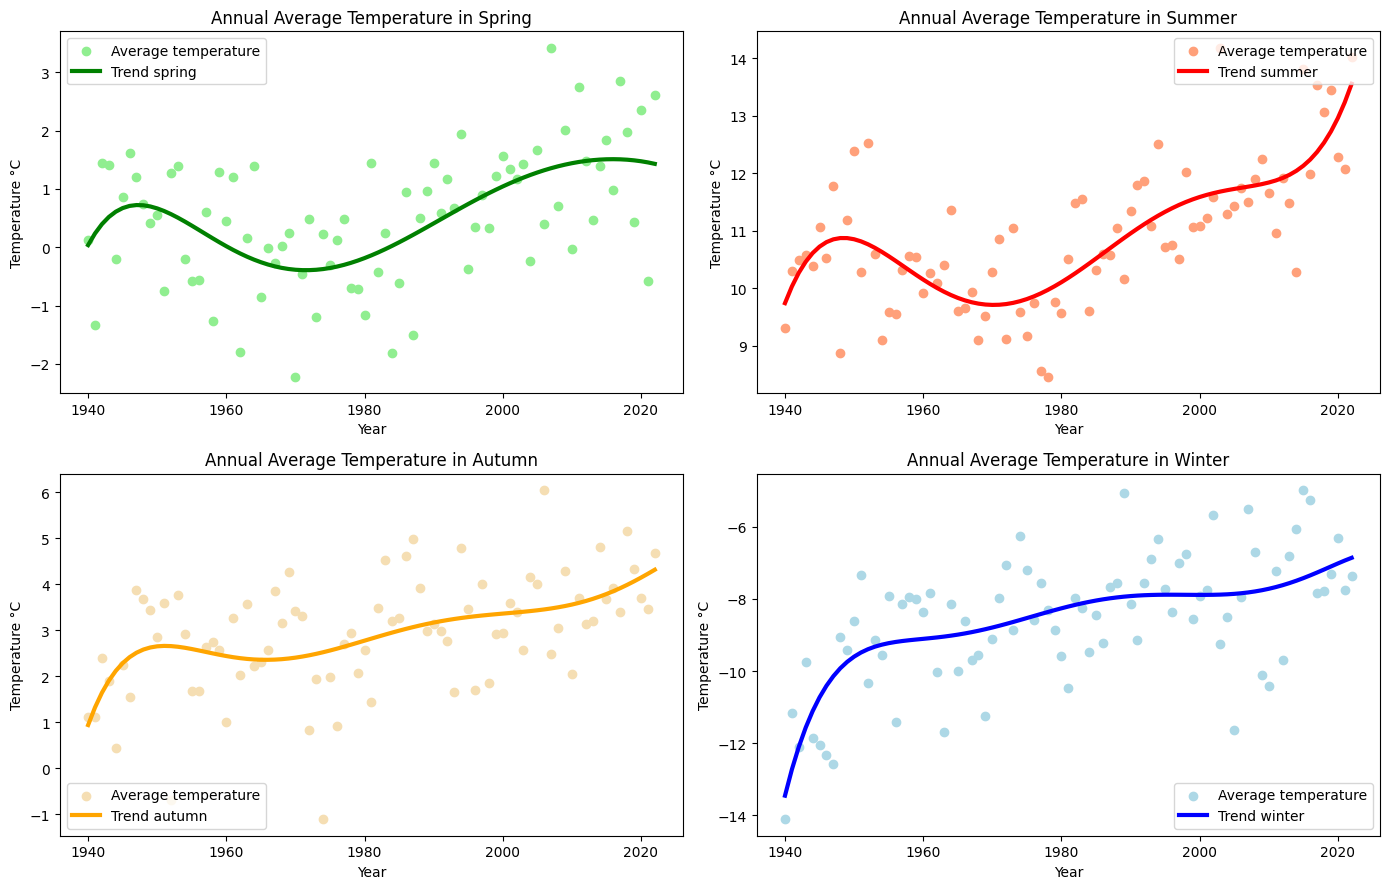

Correlazione anno-temperatura media in primavera:  0.3748610142371654
Correlazione anno-temperatura media in estate:  0.5794853844448683
Correlazione anno-temperatura media in autunno:  0.4718770481152257
Correlazione anno-temperatura media in inverno:  0.5845917928061231


In [23]:
seasonal_mean_mean_by_year(weather, years)

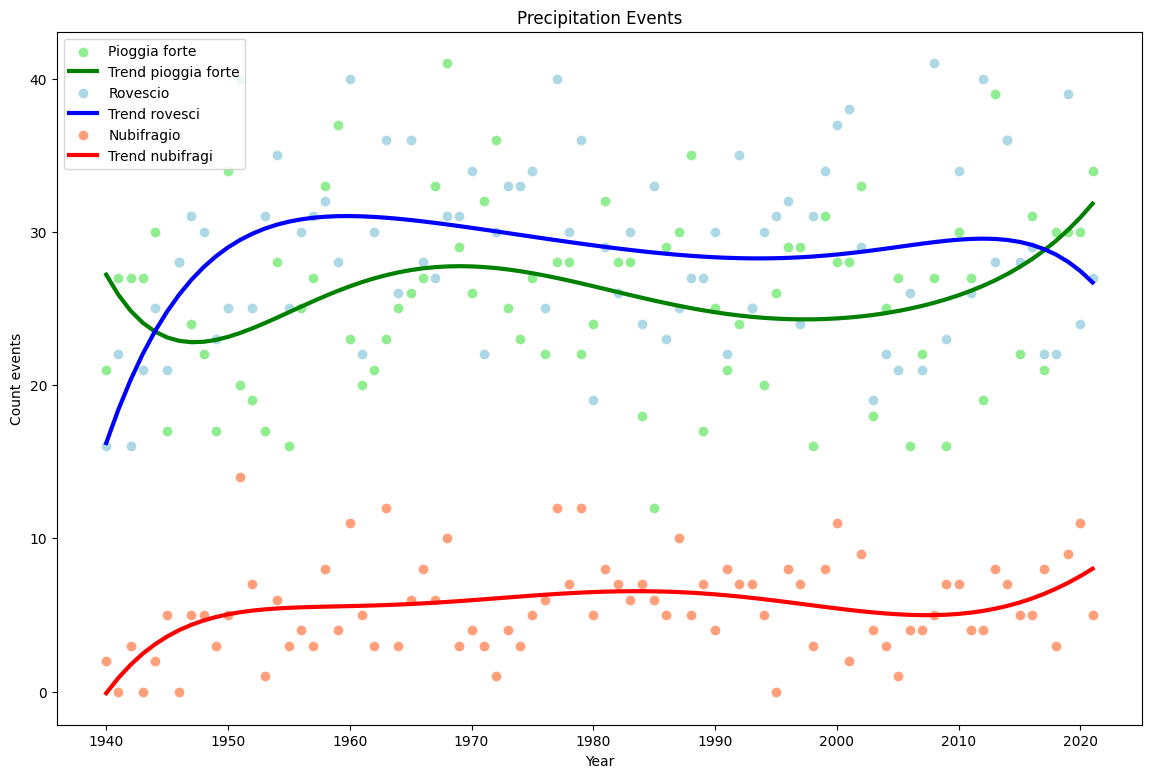

Correlazione anno-pioggia forte 0.11483465617077807
Correlazione anno-rovesci 0.10699069508078328
Correlazione anno-nubifragi 0.21280271662126563


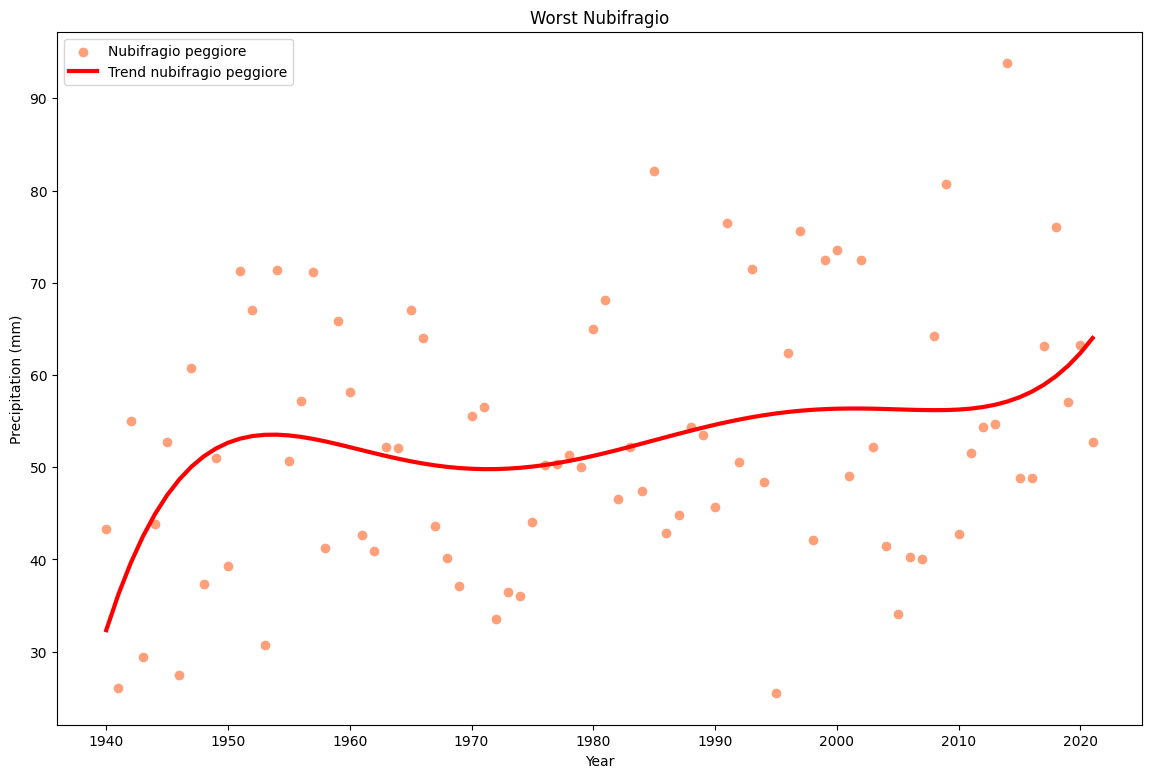

In [24]:
events_precipitation_by_year(weather, years)

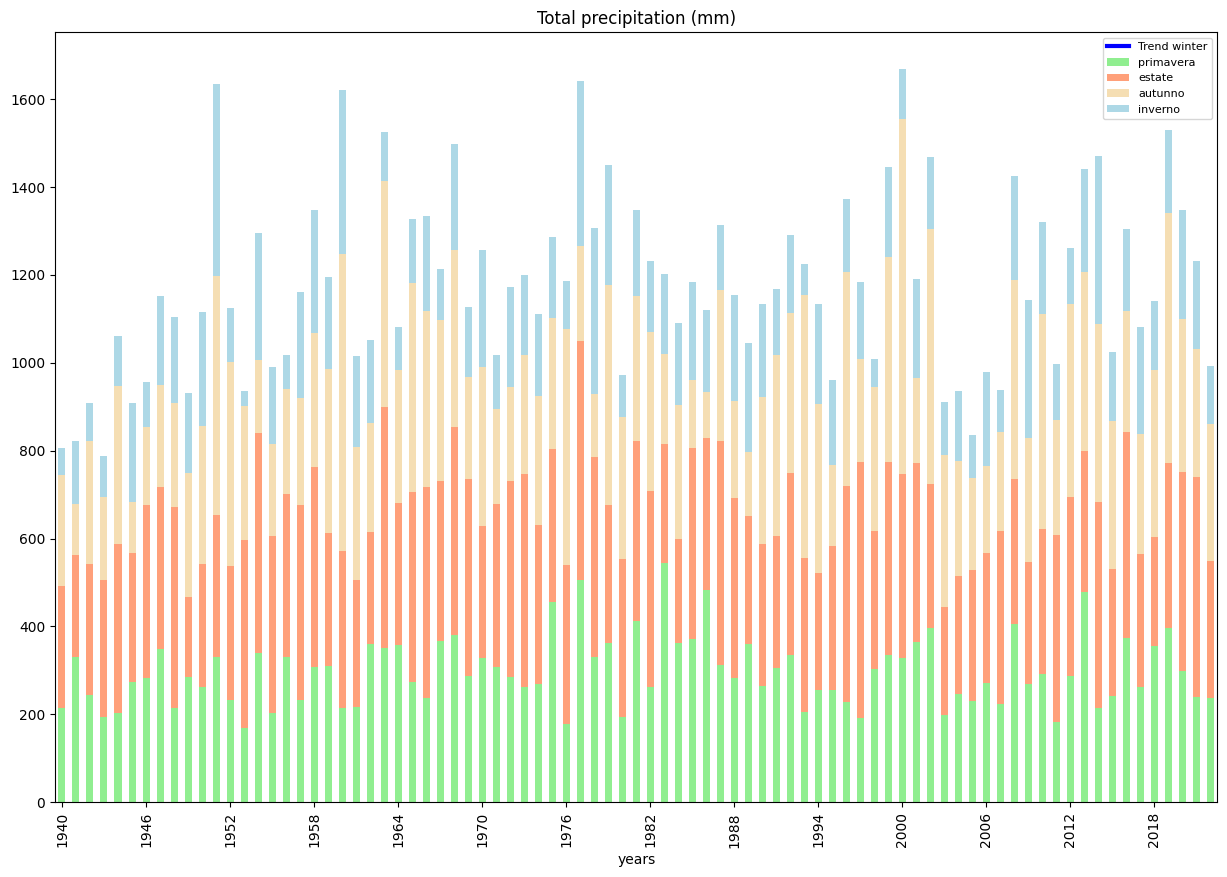

Correlazioni anno-totale precipitazioni annuali:  0.21563706203669247
Correlazioni anno-totale precipitazioni in primavera:  0.10614833610840356
Correlazioni anno-totale precipitazioni in estate:  0.04547071287946999
Correlazioni anno-totale precipitazioni in autunno:  0.20566731269553346
Correlazioni anno-totale precipitazioni in inverno:  0.061708661215203416


In [25]:
seasonal_total_precipitation_by_year(weather, years)

0.7871733351532808


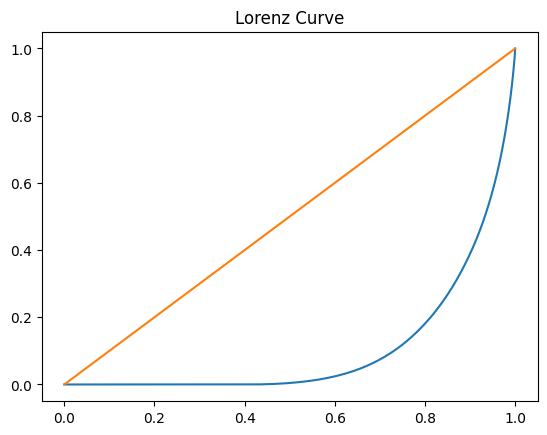

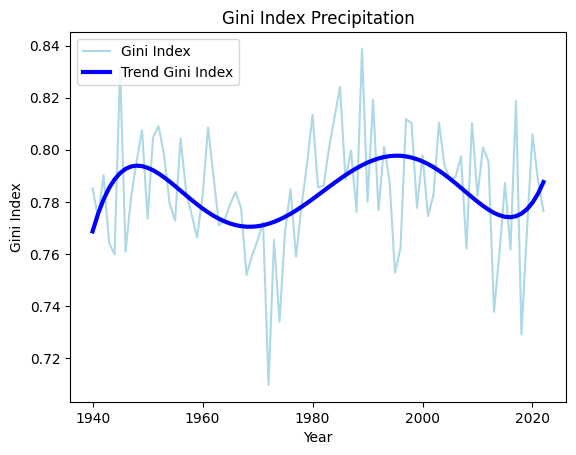

Correlazione anno-indice di concentrazione 0.03182023554980219


In [26]:
concentration_precipitation_by_year(weather, years)

In [27]:
sum_rain = []
sum_snow = []
debole = []
forte = []
rovesci = []
nubifragi = []

for year in years :
    dfyear = weather[(weather["time"].dt.strftime('%Y'))==str(year)]
    rain = dfyear["rain_sum (mm)"].sum()
    sum_rain.append(rain)
    snow = dfyear["snowfall_sum (cm)"].sum()
    sum_snow.append(snow)

    sum_debole = dfyear[(dfyear["rain_sum (mm)"]<6)]["rain_sum (mm)"].sum()
    debole.append(sum_debole)
    sum_forte  = dfyear[(dfyear["rain_sum (mm)"]>=6) & (dfyear["rain_sum (mm)"]<10)]["rain_sum (mm)"].sum()
    forte.append(sum_forte)
    sum_rovesci  = dfyear[(dfyear["rain_sum (mm)"]>=10) & (dfyear["rain_sum (mm)"]<30)]["rain_sum (mm)"].sum()
    rovesci.append(sum_rovesci)
    sum_nubifragi  = dfyear[dfyear["rain_sum (mm)"]>=30]["rain_sum (mm)"].sum()
    nubifragi.append(sum_nubifragi)

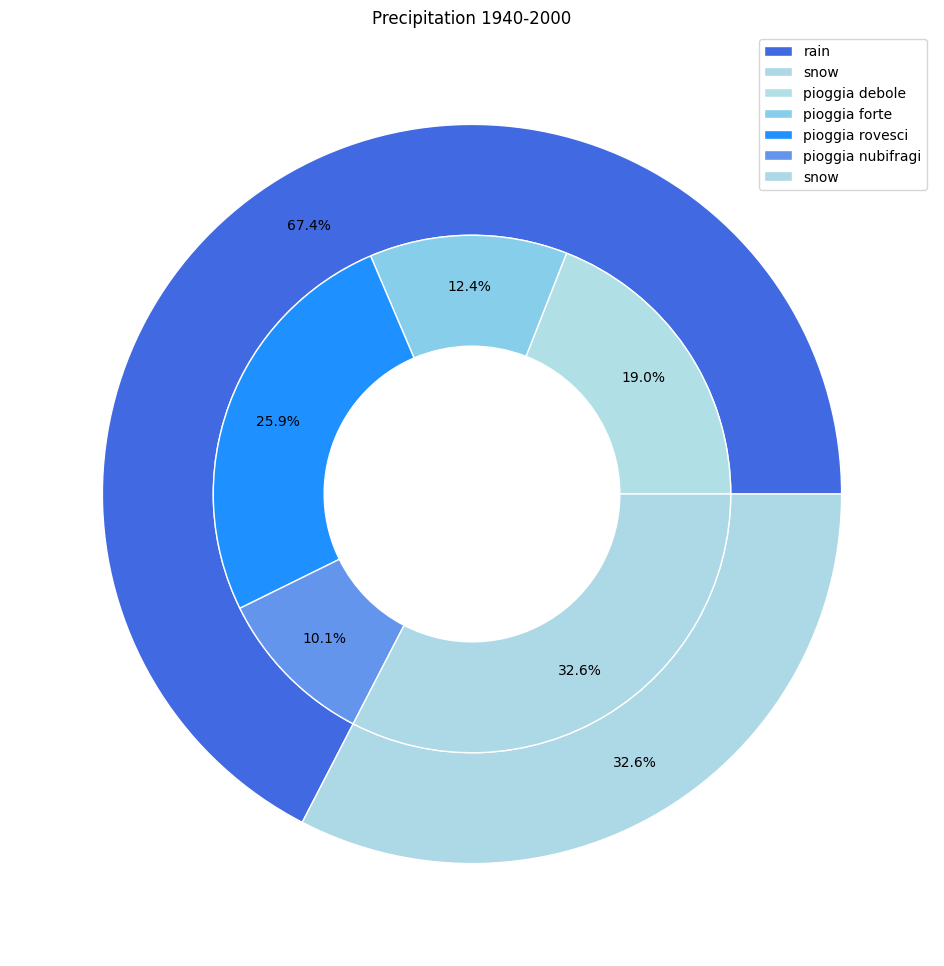

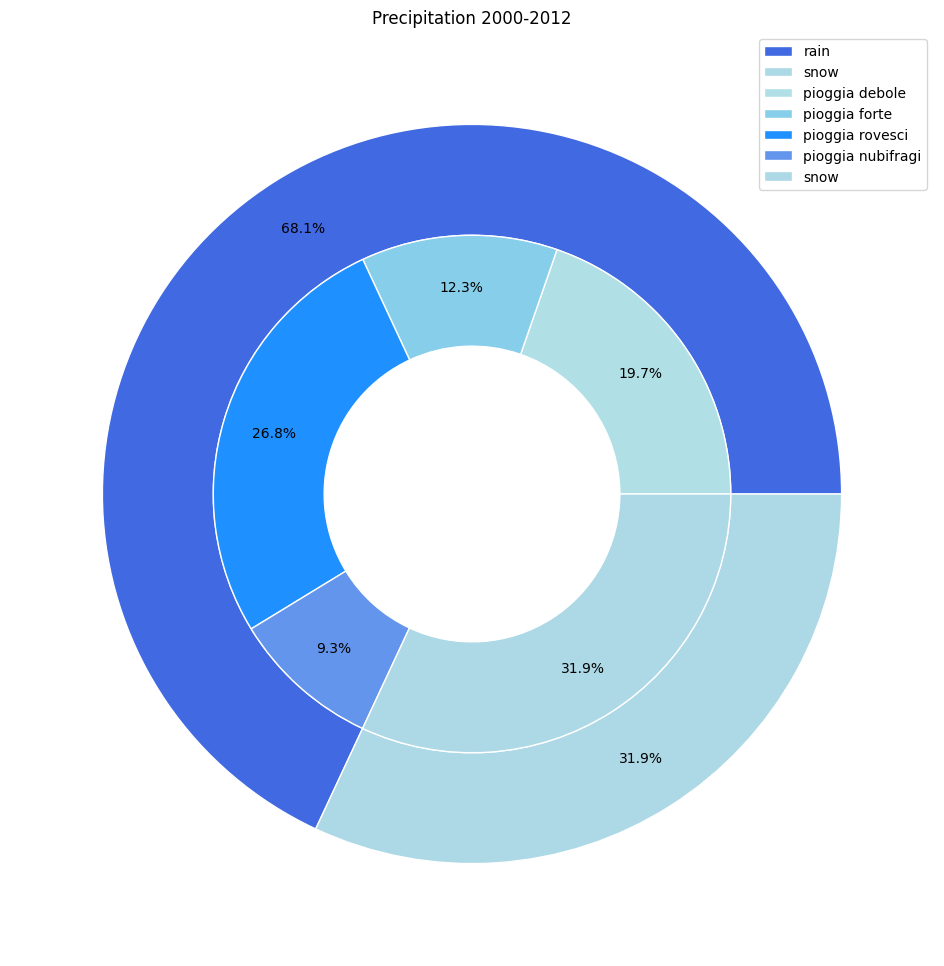

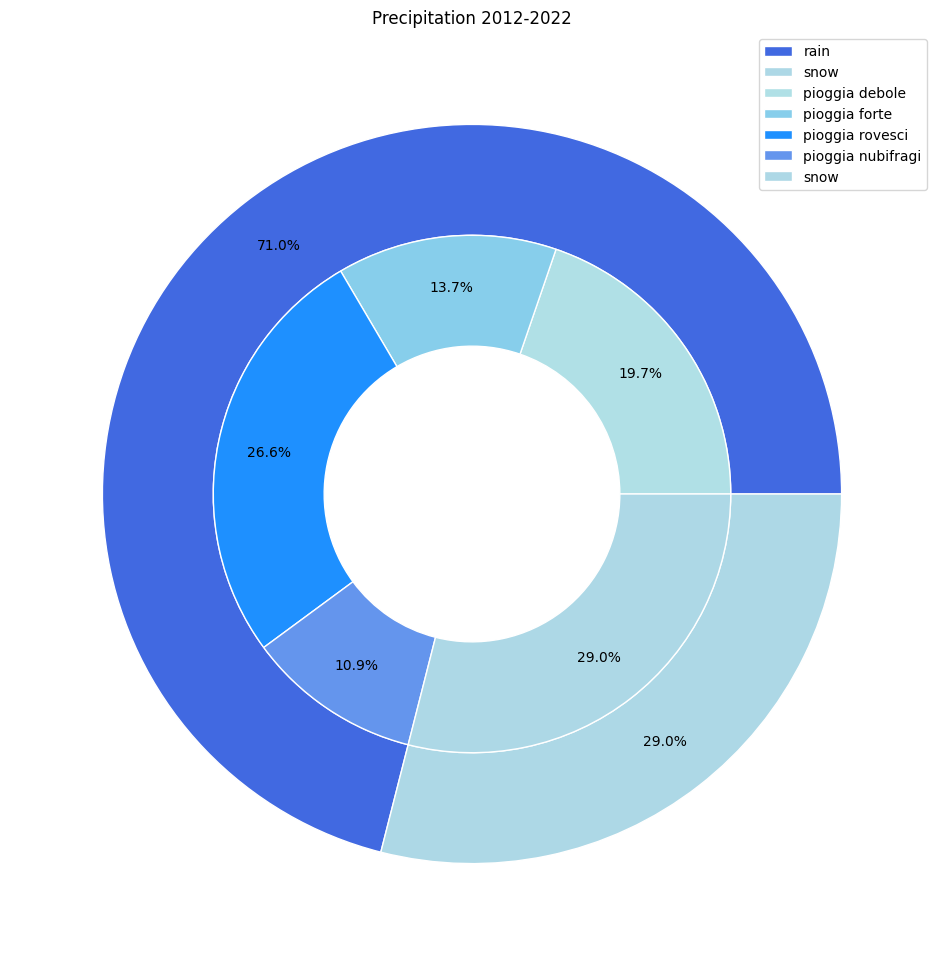

In [28]:
indexes_outer = ["rain", "snow"]
indexes_inner = ["pioggia debole", "pioggia forte", "pioggia rovesci", "pioggia nubifragi", "snow"]

color_outer = ["royalblue", "lightblue"]
color_inner = ["powderblue", "skyblue", "dodgerblue", "cornflowerblue", "lightblue"]

legend = ["rain", "snow", "pioggia debole", "pioggia forte", "pioggia rovesci", "pioggia nubifragi", "snow"]

precipitation = pd.DataFrame({"1940-2000":[np.sum(sum_rain[0:60]), np.sum(sum_snow[0:60])]}, index=indexes_outer)
rain_analysis = pd.DataFrame({"classes":[np.sum(debole[0:60]), np.sum(forte[0:60]), np.sum(rovesci[0:60]), np.sum(nubifragi[0:60]), np.sum(sum_snow[0:60])]}, 
       index=indexes_inner)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(precipitation["1940-2000"], radius=1,
       labels=None,
       autopct='%1.1f%%',
       pctdistance=0.85, 
       colors=color_outer,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(rain_analysis["classes"], radius=1-size, 
       labels = None,
       autopct='%1.1f%%',    
       pctdistance=0.8,
       colors=color_inner,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Precipitation 1940-2000')
ax.legend(labels=legend)
plt.show()


precipitation = pd.DataFrame({"2000-2022":[np.sum(sum_rain[60:72]), np.sum(sum_snow[60:72])]}, index=indexes_outer)
rain_analysis = pd.DataFrame({"classes":[np.sum(debole[60:72]), np.sum(forte[60:72]), np.sum(rovesci[60:72]), np.sum(nubifragi[60:72]), np.sum(sum_snow[60:72])]}, 
       index=indexes_inner)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(precipitation["2000-2022"], radius=1,
       labels= None,
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=color_outer,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(rain_analysis["classes"], radius=1-size, 
       labels = None,
       autopct='%1.1f%%',    
       pctdistance=0.8,
       colors=color_inner,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Precipitation 2000-2012')
ax.legend(labels=legend)
plt.show()


precipitation = pd.DataFrame({"2012-2022":[np.sum(sum_rain[72:]), np.sum(sum_snow[72:])]}, index=indexes_outer)
rain_analysis = pd.DataFrame({"classes":[np.sum(debole[72:]), np.sum(forte[72:]), np.sum(rovesci[72:]), np.sum(nubifragi[72:]), np.sum(sum_snow[72:])]}, 
       index=indexes_inner)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

ax.pie(precipitation["2012-2022"], radius=1,
       labels=None,
       autopct='%1.1f%%',
       pctdistance=0.85, 
       colors=color_outer,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(rain_analysis["classes"], radius=1-size, 
       labels = None,
       autopct='%1.1f%%',    
       pctdistance=0.8,
       colors=color_inner,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Precipitation 2012-2022')
ax.legend(labels=legend)
plt.show()

# Cagliari

In [29]:
weather, years = setup_dataframe("data/historical-weather-1940-2022/cagliari.csv")
weather

,time,max_temp,min_temp,mean_temp,precipitation,rain_sum (mm),snowfall_sum (cm),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),season
0,1940-01-01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Inverno
1,1940-01-02,10.5,5.9,8.0,0.1,0.1,0.0,4.75,0.86,Inverno
2,1940-01-03,12.3,8.4,10.4,0.4,0.4,0.0,4.99,1.24,Inverno
3,1940-01-04,15.2,11.5,12.9,8.6,8.6,0.0,4.99,0.69,Inverno
4,1940-01-05,14.6,10.4,12.3,1.9,1.9,0.0,8.30,1.13,Inverno
...,...,...,...,...,...,...,...,...,...,...
30311,2022-12-27,19.5,8.8,12.9,0.0,0.0,0.0,8.42,1.44,Inverno
30312,2022-12-28,17.8,9.5,13.1,0.0,0.0,0.0,9.12,1.30,Inverno
30313,2022-12-29,17.2,10.3,13.2,0.0,0.0,0.0,8.71,1.22,Inverno
30314,2022-12-30,17.3,8.2,12.2,0.0,0.0,0.0,7.80,1.17,Inverno


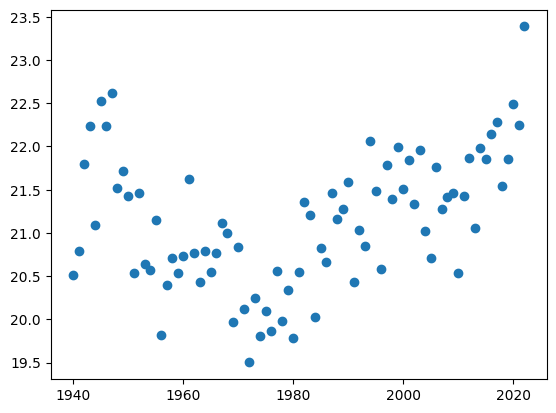

0.32314717137349824


In [30]:
avg_max_temp_by_year(weather, years)

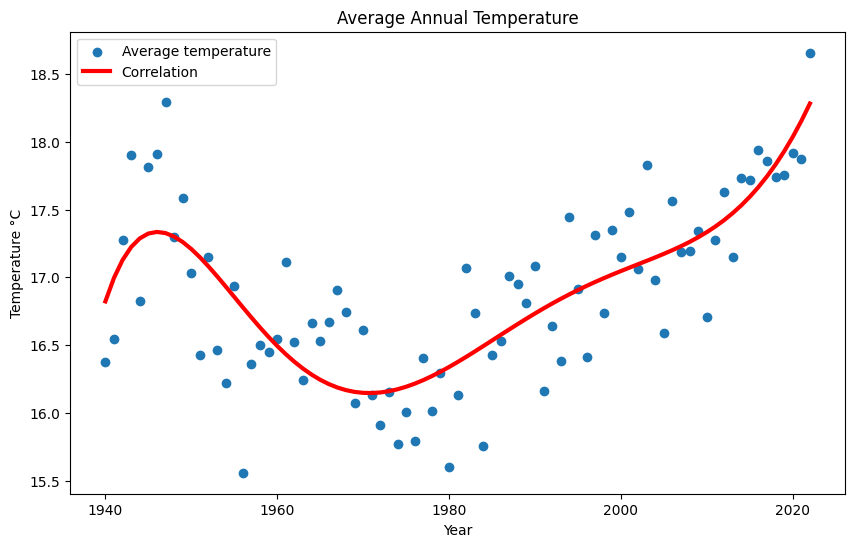

In [31]:
avg_mean_temp_by_year(weather, years)

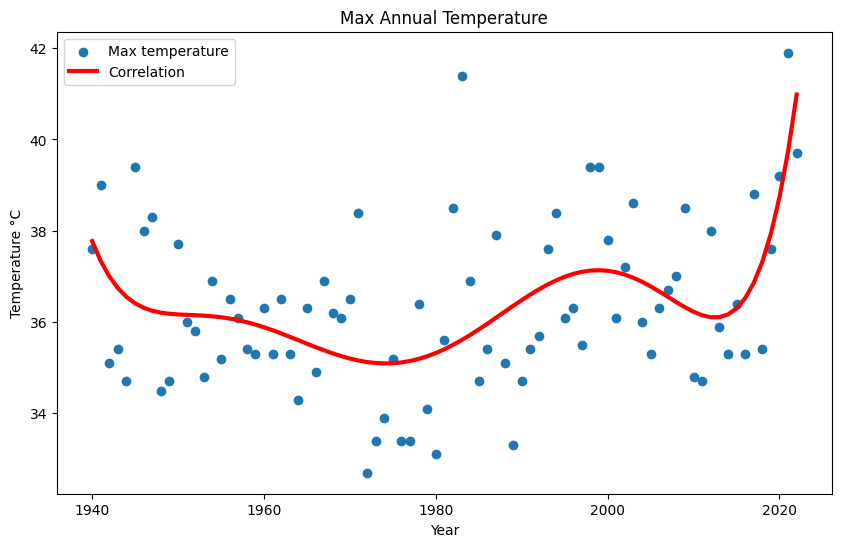

In [32]:
max_max_temp_by_year(weather, years)

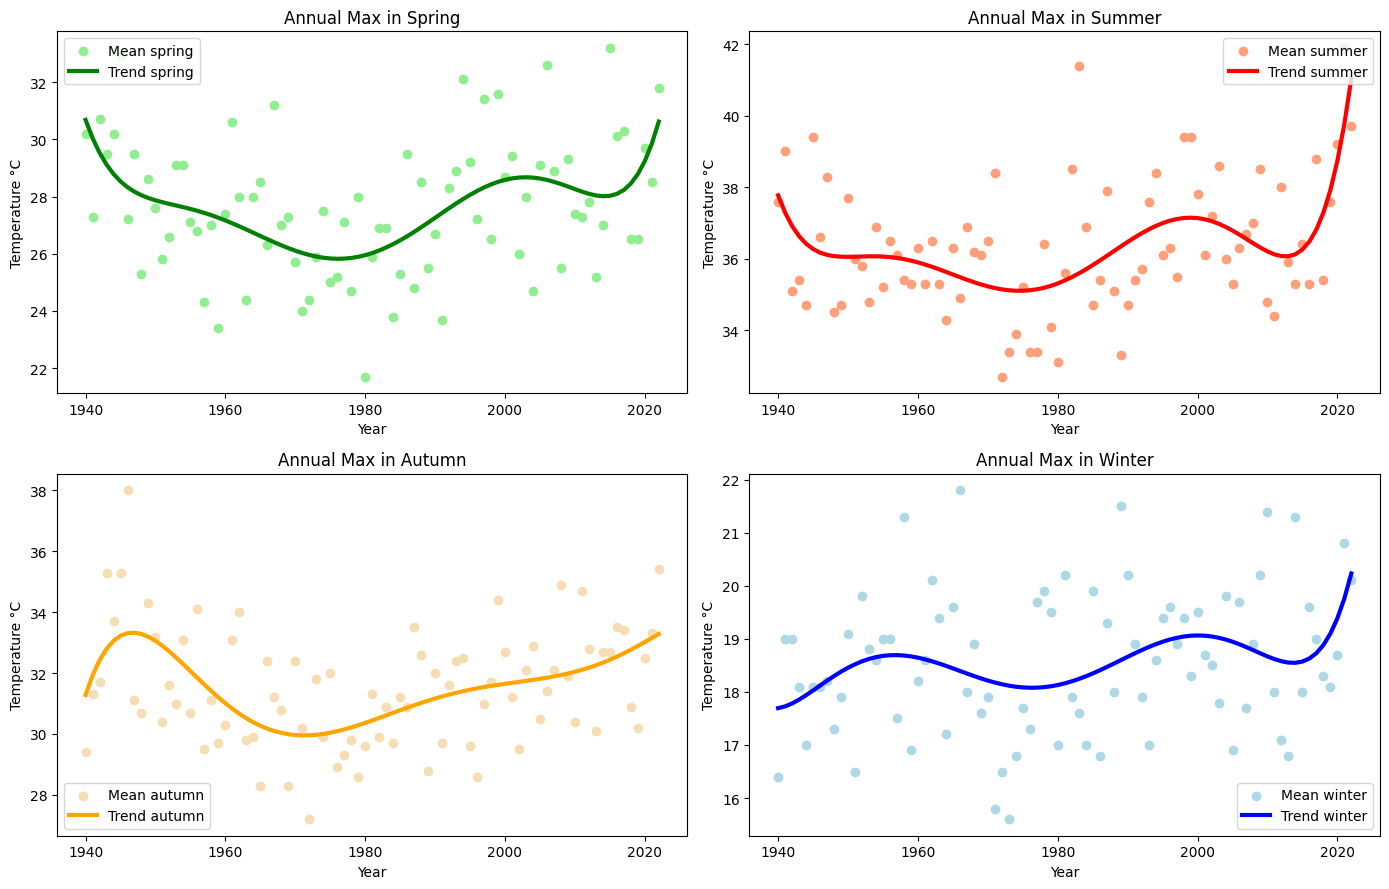

Correlazione anno-temperatura massima in primavera:  0.1034810832751616
Correlazione anno-temperatura massima in estate:  0.2328819584200658
Correlazione anno-temperatura massima in autunno:  0.04853535276640254
Correlazione anno-temperatura massima in inverno:  0.2104560352287934


In [33]:
seasonal_max_max_temp_by_year(weather, years)

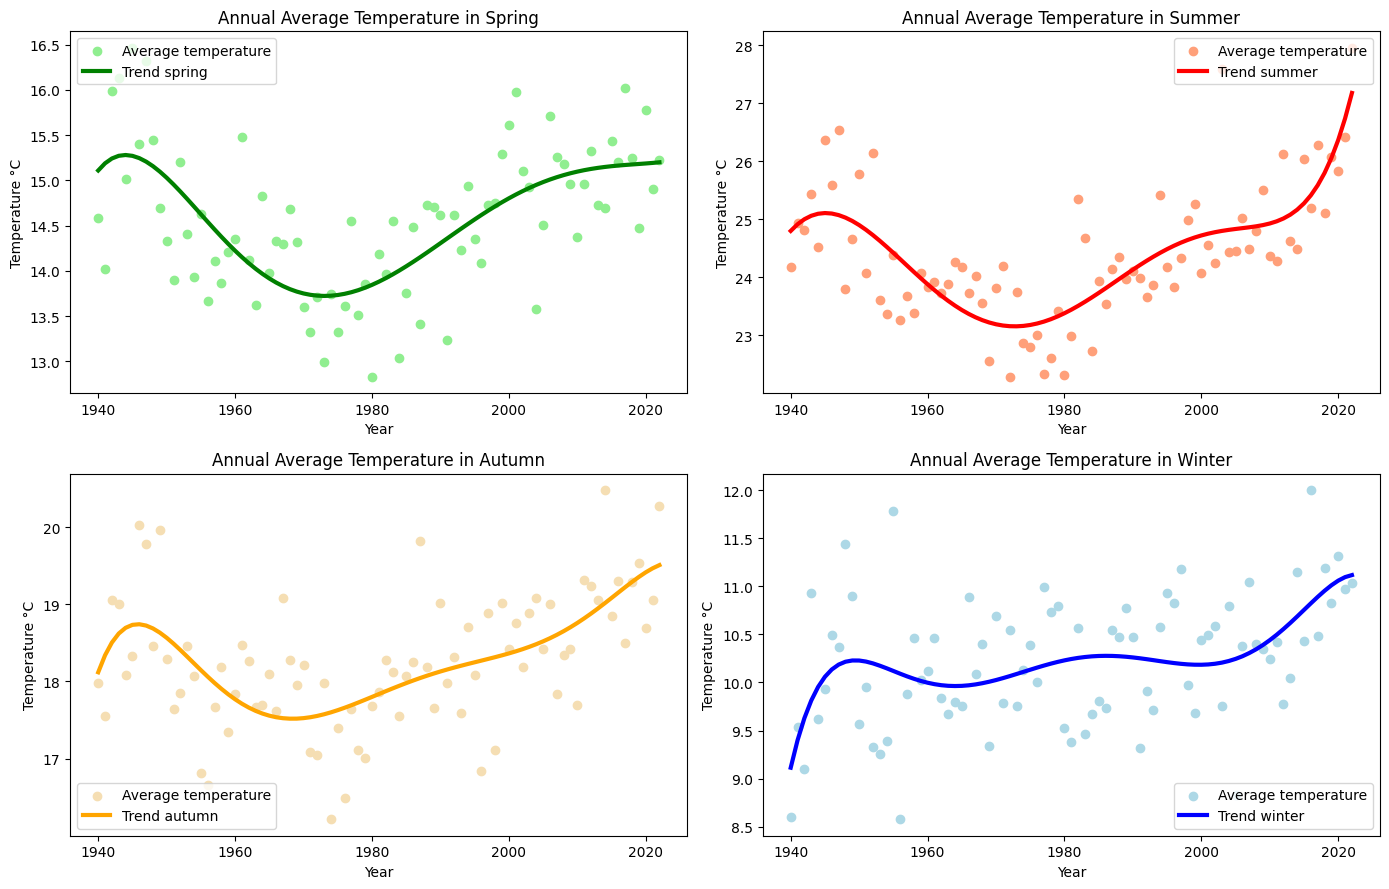

Correlazione anno-temperatura media in primavera:  0.14525448713548164
Correlazione anno-temperatura media in estate:  0.296496744576576
Correlazione anno-temperatura media in autunno:  0.3016671455527274
Correlazione anno-temperatura media in inverno:  0.36853858811298407


In [34]:
seasonal_mean_mean_by_year(weather, years)

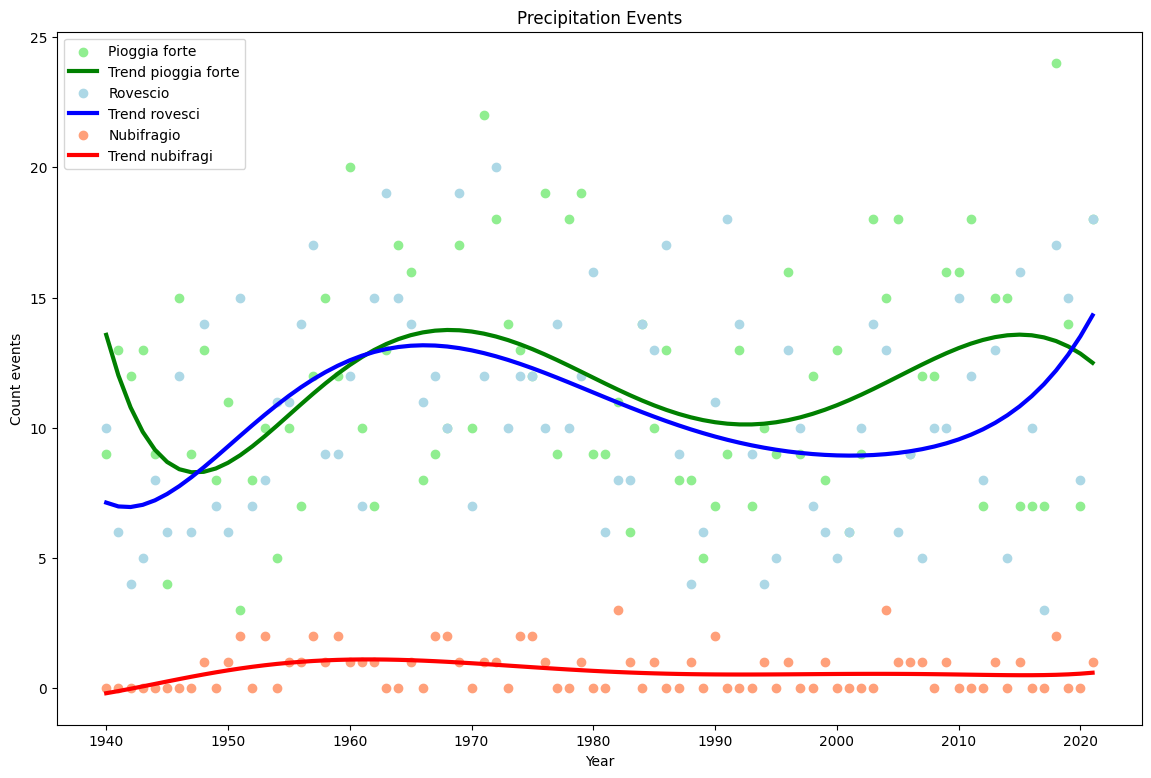

Correlazione anno-pioggia forte 0.13876260324396353
Correlazione anno-rovesci 0.04285525597572502
Correlazione anno-nubifragi -0.0533786785635275


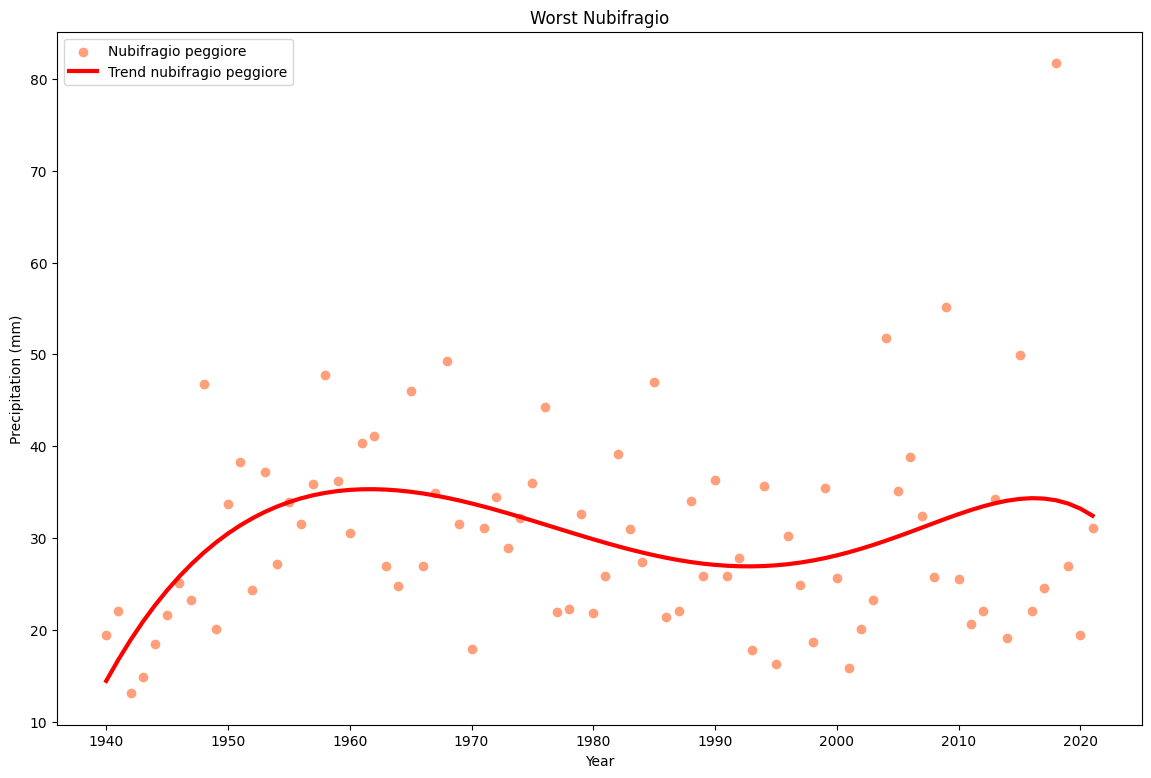

In [35]:
events_precipitation_by_year(weather, years)

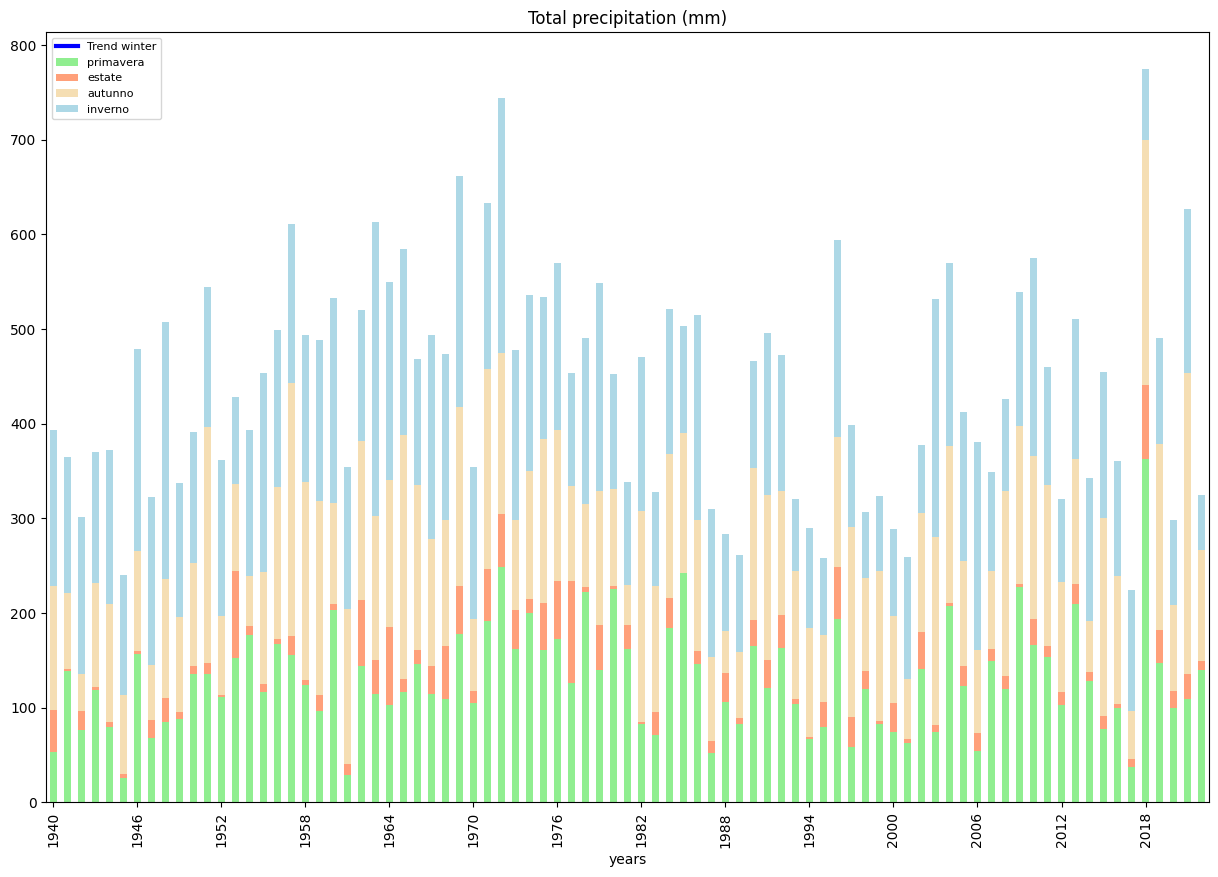

Correlazioni anno-totale precipitazioni annuali:  -0.05574175883827908
Correlazioni anno-totale precipitazioni in primavera:  0.1066994703253606
Correlazioni anno-totale precipitazioni in estate:  -0.03604555169072224
Correlazioni anno-totale precipitazioni in autunno:  0.12211905716852896
Correlazioni anno-totale precipitazioni in inverno:  -0.3697070017278993


In [36]:
seasonal_total_precipitation_by_year(weather, years)

0.8674746912953415


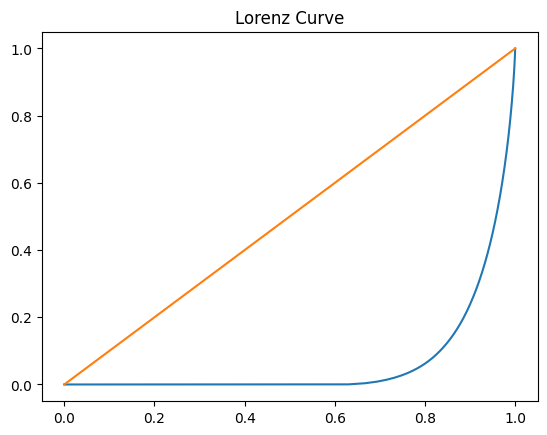

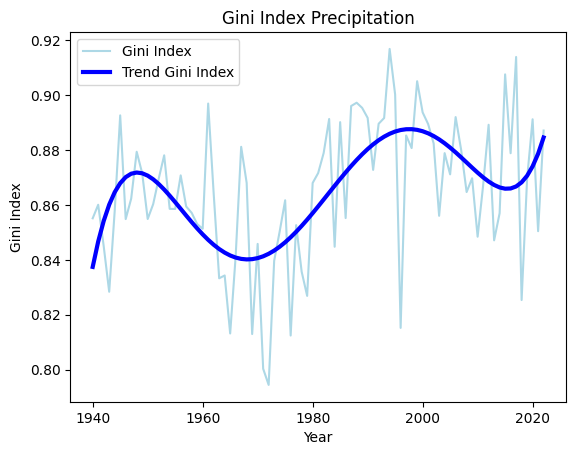

Correlazione anno-indice di concentrazione 0.32087495803381927


In [37]:
concentration_precipitation_by_year(weather, years)